# Import necessary packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

import DiadFit as pf
pf.__version__


'1.0.5'

# Setup the folder access and paths

In [2]:
if os.name=='posix':
    slash='/'
else:
    slash='\\'

MasterFolder=os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))

# #Folder to save figures

figpath=MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_Keana_Uwe_Litt'+slash+'Data_processing_L84'+slash+'Processing figs'
if not os.path.exists(figpath):
    os.mkdir(figpath)

# #Folder to save full datasets

compilation_folder=MasterFolder +slash+"Data_processing_notebooks"+slash+'Data_processing_Keana_Uwe_Litt'+slash+'Data_processing_L84'+slash+'Notebook_Compiled_data'
if not os.path.exists(compilation_folder):
    os.mkdir(compilation_folder)

# This compiles all the Raman data into one file, and exports

## First create the function

In [3]:

## This function compiles raman sessions found in the master folder (even in subdirectories of the specified folder)

def compile_Raman_sessions(*, path=None, sheet_name='Sheet1', keyword='Raman_session'):
    df = pd.DataFrame()

    for root, dirs, files in os.walk(path):
        for file in files:
            if keyword in file and file.endswith('.xlsx'):
                print(file)
                file_path = os.path.join(root, file)
                sheets = pd.read_excel(file_path, sheet_name)
                df = pd.concat([df, sheets], axis=0, ignore_index=True)
                unnamed_columns = [col for col in df.columns if 'Unnamed' in col]
                df = df.drop(columns=unnamed_columns)

    return df

## Now run the function

In [4]:
L84 = compile_Raman_sessions(path=MasterFolder+slash+"Data"+slash+"Data_Kea_Uwe_Litt"+slash+"Data_L84"+slash+"Raman",sheet_name='Sheet1',keyword='Raman_session')

Raman_session_November 11, 2022_fitted_2025-01-24.xlsx
Raman_session_October 26, 2022_fitted_2025-01-24.xlsx


# Now let's tidy , filter negative densities and test files if present, then export

In [5]:
# filter out bad ones. 
L84 = L84[(~L84['filename'].str.contains('test'))&(L84['Density g/cm3']>0)]

L84['date_object']=pd.to_datetime(L84['date'])

L84=L84.sort_values(by=['date_object', 'filename'])

L84=L84.reset_index(drop=True)

# L84['filename_4merge'] = L84['filename'] + '_index' + L84.index.astype(str)

L84.to_clipboard(excel=True, index=False)

L84.to_excel(compilation_folder+'/'+"L84_Raman_allreps.xlsx")

L84


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,preferred_values,lower_values,upper_values,Model_name_x,Peak_Cent_Carb,Peak_Area_Carb,Peak_Height_Carb,Model_name_y,Carb_Diad_Ratio,date_object
0,L84-FI39-FI#1,0.135643,0.007585,0.006529,0.003860,103.092582,0.016478,0.000007,0.016512,12.004,...,0.997930,0.997930,0.997930,NaN,NaN,NaN,NaN,NaN,NaN,2022-10-26
1,L84-FI39-FI#2,0.121354,0.073076,0.072976,0.003830,103.056520,0.184171,0.000008,0.184558,12.041,...,0.997903,0.997902,0.997903,Spline,1079.739008,907.477608,187.874333,Spline,2.817751,2022-10-26
2,L84-FI40-FI#1,0.331339,0.003529,0.002633,0.002350,103.556779,0.006128,0.000668,0.006106,11.989,...,0.997695,0.997689,0.997701,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-11
3,L84-FI41-FI#1,0.104169,0.008144,0.007199,0.003808,103.013150,0.018168,0.000666,0.018198,11.985,...,0.997696,0.997689,0.997702,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-11
4,L84-FI41-FI#2,0.115660,0.008901,0.008039,0.003821,103.042149,0.020289,0.000667,0.020325,11.970,...,0.997697,0.997690,0.997703,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-11
5,L84-FI42-FI#1,0.120194,0.004225,0.001789,0.003828,103.053591,0.004514,0.000669,0.004475,11.980,...,0.997698,0.997692,0.997705,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-11
6,L84-FI43-FI#1,0.144043,0.004564,0.002401,0.003882,103.113781,0.006059,0.000671,0.006035,11.984,...,0.997701,0.997694,0.997707,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-11
7,L84-FI44-FI#1-12mw,0.358892,0.004508,0.003848,0.002349,103.620527,0.008850,0.000677,0.008845,11.993,...,0.997704,0.997697,0.997710,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-11
8,L84-FI44-FI#1-6mw,0.359879,0.003950,0.003176,0.002349,103.622797,0.007303,0.000677,0.007288,5.996,...,0.997705,0.997698,0.997711,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-11
9,L84-FI44-FI#2-6mw,0.383665,0.003553,0.002666,0.002348,103.677208,0.006068,0.000679,0.006044,5.995,...,0.997706,0.997699,0.997713,NaN,NaN,NaN,NaN,NaN,NaN,2022-11-11


In [6]:
# sub=L84[L84['filename'].str.contains('L84-65')]

# plt.errorbar(y=sub['Density g/cm3'],x=sub['power (mW)'],yerr=sub['σ Density g/cm3'],xerr=0,fmt='o',capsize=4,ecolor='k',mec='k',mfc='white')
# plt.xlabel('laser power (mW)')
# plt.ylabel('Density g/cm3')
# plt.title('Laser power series for L84-65-FI#1')
# plt.savefig(figpath+slash+"Laser power series for L84-65-FI#1")

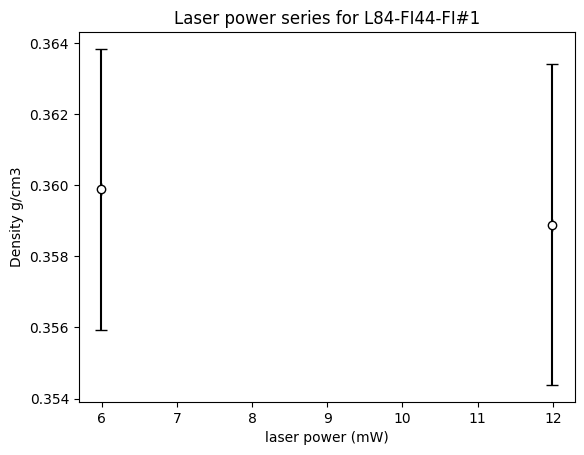

In [7]:
sub=L84[L84['filename'].str.contains('L84-FI44-FI#1')]

plt.errorbar(y=sub['Density g/cm3'],x=sub['power (mW)'],yerr=sub['σ Density g/cm3'],xerr=0,fmt='o',capsize=4,ecolor='k',mec='k',mfc='white')
plt.xlabel('laser power (mW)')
plt.ylabel('Density g/cm3')
plt.title('Laser power series for L84-FI44-FI#1')
plt.savefig(figpath+slash+"Laser power series for L84-FI44-FI#1")

## Now we merge the names to match with probe AND filter shitty analyses (sigma>0.04 and very low power)

In [8]:
rep_FI_names=pd.read_excel('Helper files/'+'Helperfile_L84.xlsx',sheet_name='Sheet1')
L84_reps = pd.merge(L84, rep_FI_names, on=['filename', 'date_object','sec since midnight'])

#filter out really low power ones (<4mW) since uncertainty not good
L84_reps=L84_reps[(L84_reps['power (mW)']>3)&~(L84['σ Density g/cm3']>0.04)]
L84_reps

,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Region,FI#,Sample_crystal,Sample_crystal_region,FI_name,Name_on_EPMA,EBSD_simple_name,EBSD_grainID,EBSDname+grainID,EBSD_comment
0,L84-FI39-FI#1,0.135643,0.007585,0.006529,0.003860,103.092582,0.016478,0.000007,0.016512,12.004,...,NaN,FI#1,L84_FI39,L84_FI39,L84_FI39_FI#1,L84-39_1,NaN,NaN,NaN,NaN
2,L84-FI40-FI#1,0.331339,0.003529,0.002633,0.002350,103.556779,0.006128,0.000668,0.006106,11.989,...,NaN,FI#1,L84_FI40,L84_FI40,L84_FI40_FI#1,L84-40_1,NaN,NaN,NaN,NaN
3,L84-FI41-FI#1,0.104169,0.008144,0.007199,0.003808,103.013150,0.018168,0.000666,0.018198,11.985,...,NaN,FI#1,L84_FI41,L84_FI41,L84_FI41_FI#1,L84-41_1,NaN,NaN,NaN,NaN
4,L84-FI41-FI#2,0.115660,0.008901,0.008039,0.003821,103.042149,0.020289,0.000667,0.020325,11.970,...,NaN,FI#2,L84_FI41,L84_FI41,L84_FI41_FI#2,L84-41_2,NaN,NaN,NaN,NaN
5,L84-FI42-FI#1,0.120194,0.004225,0.001789,0.003828,103.053591,0.004514,0.000669,0.004475,11.980,...,NaN,FI#1,L84_FI42,L84_FI42,L84_FI42_FI#1,L84-42_1,NaN,NaN,NaN,NaN
6,L84-FI43-FI#1,0.144043,0.004564,0.002401,0.003882,103.113781,0.006059,0.000671,0.006035,11.984,...,NaN,FI#1,L84_FI43,L84_FI43,L84_FI43_FI#1,L84-43_1,NaN,NaN,NaN,NaN
7,L84-FI44-FI#1-12mw,0.358892,0.004508,0.003848,0.002349,103.620527,0.008850,0.000677,0.008845,11.993,...,NaN,FI#1,L84_FI44,L84_FI44,L84_FI44_FI#1,L84-44_1,NaN,NaN,NaN,NaN
8,L84-FI44-FI#1-6mw,0.359879,0.003950,0.003176,0.002349,103.622797,0.007303,0.000677,0.007288,5.996,...,NaN,FI#1,L84_FI44,L84_FI44,L84_FI44_FI#1,L84-44_1,NaN,NaN,NaN,NaN
9,L84-FI44-FI#2-6mw,0.383665,0.003553,0.002666,0.002348,103.677208,0.006068,0.000679,0.006044,5.995,...,NaN,FI#2,L84_FI44,L84_FI44,L84_FI44_FI#2,L84-44_2,NaN,NaN,NaN,NaN
10,L84-FI45-FI#1,0.124218,0.003976,0.001049,0.003835,103.063747,0.002648,0.000677,0.002566,11.972,...,NaN,FI#1,L84_FI45,L84_FI45,L84_FI45_FI#1,L84-45_1,NaN,NaN,NaN,NaN


## Now let's take mean of repeated analyses

In [9]:
grouped = L84_reps.groupby('FI_name')

# Separate numeric and non-numeric columns
numeric_cols = L84_reps.select_dtypes(include='number')
non_numeric_cols = L84_reps.select_dtypes(exclude='number')

# Aggregate numeric columns by mean and standard deviation
numeric_L84_averaged_mean = grouped[numeric_cols.columns].mean()
numeric_L84_averaged_std = grouped[numeric_cols.columns].std()

# Take the first instance for non-numeric columns
non_numeric_L84_averaged = grouped[non_numeric_cols.columns].first()

# Concatenate L84_averageds and reindex columns to the original order
L84_averaged = pd.concat([numeric_L84_averaged_mean, non_numeric_L84_averaged], axis=1)
L84_averaged = L84_averaged.reindex(columns=L84_reps.columns)

# Add standard deviation columns after reindexing
L84_averaged = pd.concat([L84_averaged, numeric_L84_averaged_std.add_suffix('_Raman_STD')], axis=1)

# Reset index to get a DataFrame
L84_averaged = L84_averaged.reset_index(drop=True)

row_counts = grouped.size().reset_index(name='row_count')

# Add a new column "averaged?" based on the row count
row_counts['averaged?'] = 'No'
row_counts.loc[row_counts['row_count'] > 1, 'averaged?'] = 'Yes'

# Merge the row counts back to the aggregated DataFrame
L84_averaged = pd.merge(L84_averaged, row_counts[['FI_name', 'averaged?']], on='FI_name', how='left')

# If there are missing values (groups with a single row), fill them with 'No'
L84_averaged['averaged?'] = L84_averaged['averaged?'].fillna('No')

#exclude a weird null average spectrum
# L84_averaged=L84_averaged[~(L84_averaged['filename'].str.contains("186-9-118-A"))]
L84_averaged.to_excel(compilation_folder+'/'+"L84_Raman_averaged.xlsx")

L84_averaged


,filename,Density g/cm3,σ Density g/cm3,σ Density g/cm3 (from Ne+peakfit),σ Density g/cm3 (from densimeter),Corrected_Splitting,Corrected_Splitting_σ,Corrected_Splitting_σ_Ne,Corrected_Splitting_σ_peak_fit,power (mW),...,Peak_Cent_Carb_Raman_STD,Peak_Area_Carb_Raman_STD,Peak_Height_Carb_Raman_STD,Carb_Diad_Ratio_Raman_STD,Region_Raman_STD,EBSD_simple_name_Raman_STD,EBSD_grainID_Raman_STD,EBSDname+grainID_Raman_STD,EBSD_comment_Raman_STD,averaged?
0,L84-FI39-FI#1,0.135643,0.007585,0.006529,0.003860,103.092582,0.016478,0.000007,0.016512,12.0040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
1,L84-FI40-FI#1,0.331339,0.003529,0.002633,0.002350,103.556779,0.006128,0.000668,0.006106,11.9890,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
2,L84-FI41-FI#1,0.104169,0.008144,0.007199,0.003808,103.013150,0.018168,0.000666,0.018198,11.9850,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
3,L84-FI41-FI#2,0.115660,0.008901,0.008039,0.003821,103.042149,0.020289,0.000667,0.020325,11.9700,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
4,L84-FI42-FI#1,0.120194,0.004225,0.001789,0.003828,103.053591,0.004514,0.000669,0.004475,11.9800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
5,L84-FI43-FI#1,0.144043,0.004564,0.002401,0.003882,103.113781,0.006059,0.000671,0.006035,11.9840,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
6,L84-FI44-FI#1-12mw,0.359385,0.004229,0.003512,0.002349,103.621662,0.008076,0.000677,0.008066,8.9945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes
7,L84-FI44-FI#2-6mw,0.383665,0.003553,0.002666,0.002348,103.677208,0.006068,0.000679,0.006044,5.9950,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
8,L84-FI45-FI#1,0.124218,0.003976,0.001049,0.003835,103.063747,0.002648,0.000677,0.002566,11.9720,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
9,L84-FI46-FI#1,0.125625,0.005542,0.003998,0.003838,103.067297,0.010089,0.000678,0.010089,11.9750,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No
